# Supriti Rosita - 200968260 - ML Project Phase 1

## Problem Statement: 
To build a Movie Recommender System (an app with a simply UI) to allow the user to search for movies and recommendations.


## Objective:
• To provide accurate movie recommendations to users. 

• To ensure that the movie recommender system built on par in terms of quality-accuracy, prediction, scalability and user experience in comparison to pure approaches.

Implementation of the above using a hybrid approach of content-based and collaborative filtering(item based). The methodology for approach is to try and obtain the best optimized result using K-Means Clustering along with K-Nearest Neighbour

## Meta Data:
#### Summary-

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. This dataset was generated on September 26, 2018.

#### Links Data File (links.csv)
•Identifiers that can be used to link to other sources of movie data 

• Each line of this file after the header row represents one movie, and has the following format:
"movieId"-an identifier for movies used by https://movielens.org,
"imdbId"- an identifier for movies used by http://www.imdb.com, and,
"tmdbId"- an identifier for movies used by https://www.themoviedb.org.

#### Movies Data File (movies.csv)
• Contains movie information under the attributes-movieId,title,genres

• Movie titles include year of release in parentheses.

•Genres are pipe-seperated and belong to the list: Action, Adventure, Animation, Children's, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western, (no genres listed)

#### Ratings Data File (ratings.csv)
• Contains all user ratings with attributes as- "userId","movieId","rating","timestamp"

• Each line of this file after the header row represents one rating of one movie by one user

• The lines within this file are ordered first by userId, then, within user, by movieId.

• Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

•Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

#### Tags Data File (tags.csv)
• All user-generated metadata about the movies is contained in this file in the format: "userId","movieId","tag","timestamp".

• Each line of this file after the header row represents one tag applied to one movie by one user and the lines are ordered first by userId, then, within user, by movieId.

• Each tag is typically a single word or short phrase whose meaning/value/purpose is determined by each user

•Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

## Preprocessing 

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from wordcloud import WordCloud
%matplotlib inline

### 2. Importing Datasets(ml-latest-small)

In [2]:
l_d = pd.read_csv("links.csv")
m_d = pd.read_csv("movies.csv")
r_d = pd.read_csv("ratings.csv")
t_d = pd.read_csv("tags.csv")

In [3]:
l_d.head();
l_d

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [4]:
m_d.head()
m_d

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
#splitting year from movie name
m_split= m_d['title'].str.slice(start=-5, stop= -1)
m_split

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
9737    2017
9738    2017
9739    2017
9740    2018
9741    1991
Name: title, Length: 9742, dtype: object

In [6]:
m_d['year of release']=m_split
m_d

,movieId,title,genres,year of release
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


In [7]:
r_d.head();
r_d

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [8]:
#making "timestamp" readable
r_d['timestamp'] = pd.to_datetime(r_d['timestamp'], unit='s')
r_d.columns = ['userId', 'movieId','rating' ,'timing']
r_d.head(5)

,userId,movieId,rating,timing
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [9]:
#To clearly understand which movies a user has watched and rated and for easier interpretation, we make a new dataframe with each column representing a unique userId and rach row representing a unique movieId.
f_d = r_d.pivot(index='movieId',columns='userId',values='rating')
f_d.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


It is much easier to understand the movies a particular user has rated and not rated(represented by NaN). Replacing all the NaN (missing ratings) with 0.

In [10]:
f_d.fillna(0,inplace=True)
f_d.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
t_d.head();
t_d

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [12]:
#making "timestamp" readable
t_d['timestamp'] = pd.to_datetime(t_d['timestamp'], unit='s')
t_d.columns = ['userId', 'movieId','tag' ,'timing']
t_d.head(5)

,userId,movieId,tag,timing
0,2,60756,funny,2015-10-24 19:29:54
1,2,60756,Highly quotable,2015-10-24 19:29:56
2,2,60756,will ferrell,2015-10-24 19:29:52
3,2,89774,Boxing story,2015-10-24 19:33:27
4,2,89774,MMA,2015-10-24 19:33:20


### 3. Checking for missing values

In [13]:
l_d.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

Every movie has a unique movieID so removing/replacing with mean the 8 tmdbId values is irrelevant

In [14]:
m_d.isnull().sum()

movieId            0
title              0
genres             0
year of release    0
dtype: int64

In [15]:
r_d.isnull().sum()

userId     0
movieId    0
rating     0
timing     0
dtype: int64

In [16]:
t_d.isnull().sum()

userId     0
movieId    0
tag        0
timing     0
dtype: int64

### 4. Removing Noisy Data
Adding filters to remove:

•a movie if it has less than 10 users' votes

•a user if they have voted for less than 50 movies

In [17]:
#clustering number of movies voted upon and number of users who voted 
u_v = r_d.groupby('movieId')['rating'].agg('count')
m_v = r_d.groupby('userId')['rating'].agg('count')

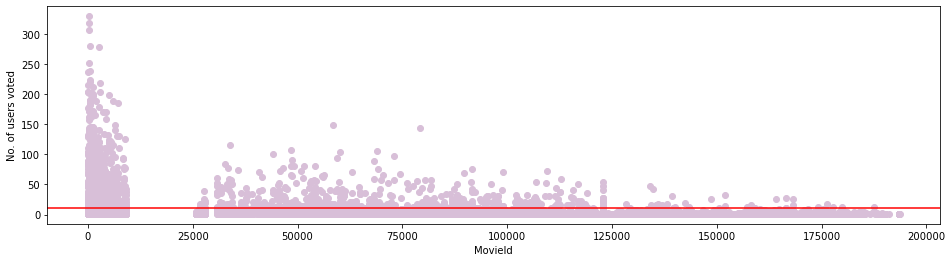

In [18]:
#visualising movies with a threshold of 10 votes
f,ax = plt.subplots(1,1,figsize=(16,4))
# r_d['rating'].plot(kind='hist')
plt.scatter(u_v.index,u_v,color='thistle')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [19]:
#modifying the final dataset wrt to set limit of 10 users' votes
f_d = f_d.loc[u_v[u_v > 10].index,:]

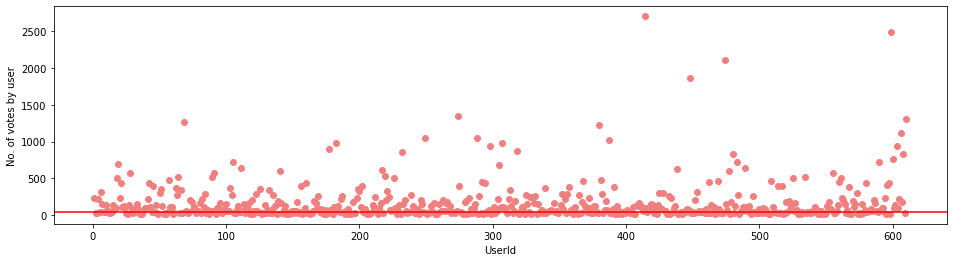

In [20]:
#visualising users with a threshold of 50 votes
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(m_v.index,m_v,color='lightcoral')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [21]:
#modifying the final dataset wrt to set limit of 50 movies voted per user
f_d=f_d.loc[:,m_v[m_v > 50].index]
f_d

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


since there exist quite a few zero values, we need to remove values-removing sparsity.

In [22]:
csr_data = csr_matrix(f_d.values)
f_d.reset_index(inplace=True)
csr_data

<2121x378 sparse matrix of type '<class 'numpy.float64'>'
	with 72893 stored elements in Compressed Sparse Row format>

### 5. Data Cleaning

In [23]:
#Merging movies and ratings dataset

df = pd.merge(r_d, m_d, on='movieId' , how='left')
df.head(5)

,userId,movieId,rating,timing,title,genres,year of release
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995


In [24]:
#Finding the different types of genres in the dataset

genres_unique = pd.DataFrame(df['genres'].str.split('|').tolist()).stack().unique()
genres_list=genres_unique[:len(genres_unique)-1]
genres_unique

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Action', 'Crime', 'Thriller', 'Mystery', 'Horror',
       'Drama', 'War', 'Western', 'Sci-Fi', 'Musical', 'Film-Noir',
       'IMAX', 'Documentary', '(no genres listed)'], dtype=object)

## Exploratory Analysis

### 1. Top 10 rated movies

In [25]:
vc= df['title'].value_counts()
vc

Forrest Gump (1994)                                              329
Shawshank Redemption, The (1994)                                 317
Pulp Fiction (1994)                                              307
Silence of the Lambs, The (1991)                                 279
Matrix, The (1999)                                               278
                                                                ... 
A Detective Story (2003)                                           1
Ask the Dust (2006)                                                1
Kiss Me Kate (1953)                                                1
Do You Remember Dolly Bell? (Sjecas li se, Dolly Bell) (1981)      1
Itty Bitty Titty Committee (2007)                                  1
Name: title, Length: 9719, dtype: int64

In [26]:
vc_df = pd.DataFrame(vc)
vc_df= vc_df.reset_index()
vc_df.columns = ['movie', 'ratings'] 
vc_df

,movie,ratings
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278
...,...,...
9714,A Detective Story (2003),1
9715,Ask the Dust (2006),1
9716,Kiss Me Kate (1953),1
9717,"Do You Remember Dolly Bell? (Sjecas li se, Dol...",1


In [27]:
tt=df['title'].value_counts()[:10]
tt

Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: title, dtype: int64

In [28]:
tten= pd.DataFrame(tt)
tten= tten.reset_index()
tten.columns = ['movie', 'instances'] 
tten

,movie,instances
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278
5,Star Wars: Episode IV - A New Hope (1977),251
6,Jurassic Park (1993),238
7,Braveheart (1995),237
8,Terminator 2: Judgment Day (1991),224
9,Schindler's List (1993),220


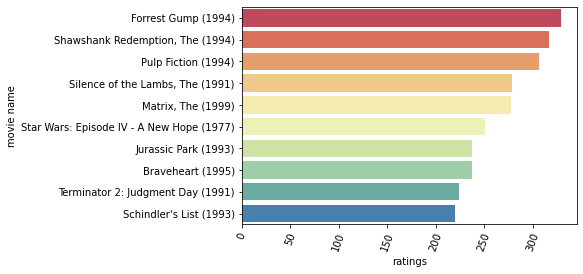

In [29]:
sns.barplot(x = "instances", y = "movie", palette = 'Spectral', data = tten)
plt.xticks(rotation=70)
plt.xlabel("ratings")
plt.ylabel("movie name")
plt.show()

<AxesSubplot:>

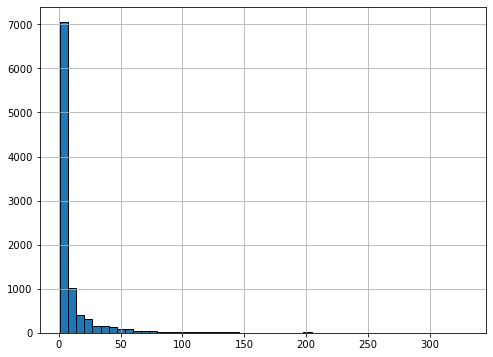

In [30]:
#the distribution of movies recieve a mean amount of reviews:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
vc_df['ratings'].hist(bins=50)

Number of movies recieving reviews over 100 are insignificant.


Most movies recieve under 50 reviews.

### 2. Ratings (no.) based on yearwise release date

In [31]:
v=df['year of release'].value_counts()
v

1995    6143
1994    5296
1999    4535
1996    4509
2000    4268
        ... 
ligh       1
995)       1
 Roa       1
1917       1
he O       1
Name: year of release, Length: 127, dtype: int64

In [32]:
v_df = pd.DataFrame(v)
v_df= v_df.reset_index()
v_df.columns = ['Released Year', 'Instances'] 
vdf=v_df.head(25)
vdf

,Released Year,Instances
0,1995,6143
1,1994,5296
2,1999,4535
3,1996,4509
4,2000,4268
5,2001,3914
6,1993,3741
7,1997,3643
8,2002,3642
9,1998,3556


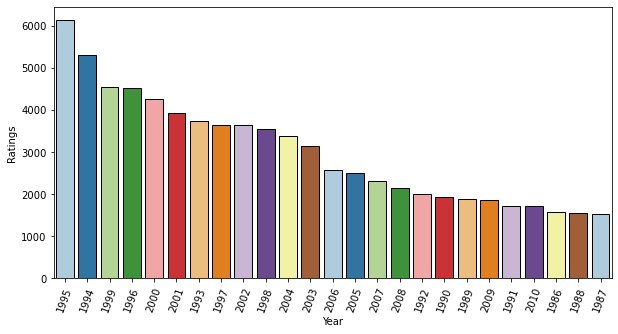

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x = "Released Year", y = "Instances", palette = 'Paired', data = vdf)
plt.xticks(rotation=70)
plt.xlabel("Year")
plt.ylabel("Ratings")
plt.show()


### 3. Number of ratings per year

In [34]:
df['Year of Rating']= df['timing'].dt.year
df

,userId,movieId,rating,timing,title,genres,year of release,Year of Rating
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,2000
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,1995,2000
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,1995,2000
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995,2000
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995,2000
...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller,2017,2017
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller,2017,2017
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror,2017,2017
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi,2017,2017


In [35]:
rating_graph= df['Year of Rating'].value_counts()
rating_graph

2000    10061
2017     8198
2007     7114
2016     6703
2015     6616
2018     6418
1996     6040
2005     5813
2012     4656
2008     4351
2009     4158
2006     4059
2003     4014
2001     3922
2002     3478
2004     3279
1999     2439
2010     2301
1997     1916
2011     1690
2013     1664
2014     1439
1998      507
Name: Year of Rating, dtype: int64

In [36]:
rating_g= pd.DataFrame(rating_graph)
rating_g=rating_g.reset_index()
rating_g.columns = ['Year of rating', 'instances'] 
rating_g

,Year of rating,instances
0,2000,10061
1,2017,8198
2,2007,7114
3,2016,6703
4,2015,6616
5,2018,6418
6,1996,6040
7,2005,5813
8,2012,4656
9,2008,4351


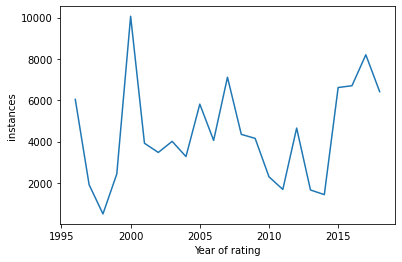

In [37]:
sns.lineplot(x="Year of rating", y="instances", data=rating_g)
plt.show()

### 4. Most popular genre

In [38]:
dummies = df['genres'].str.get_dummies()
dummies

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
100832,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
100833,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
100834,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [39]:
graph = dummies.sum().sort_values()
graph

(no genres listed)       47
Film-Noir               870
Documentary            1219
Western                1930
Musical                4138
IMAX                   4145
War                    4859
Animation              6988
Horror                 7291
Mystery                7674
Children               9208
Fantasy               11834
Crime                 16681
Sci-Fi                17243
Romance               18124
Adventure             24161
Thriller              26452
Action                30635
Comedy                39053
Drama                 41928
dtype: int64

In [40]:
genres = pd.DataFrame(graph)
genres= genres.reset_index()
genres.columns = ['genre', 'instances'] 
genres

,genre,instances
0,(no genres listed),47
1,Film-Noir,870
2,Documentary,1219
3,Western,1930
4,Musical,4138
5,IMAX,4145
6,War,4859
7,Animation,6988
8,Horror,7291
9,Mystery,7674


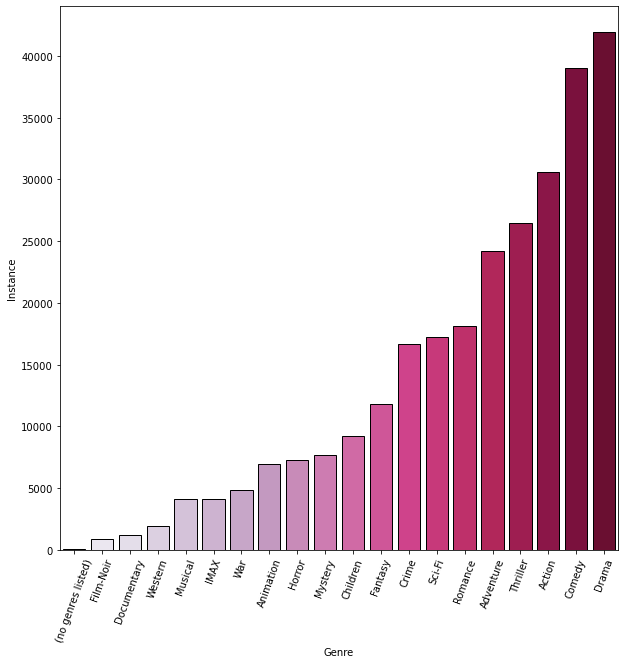

In [41]:
#no. of films per genre
plt.figure(figsize=(10,10))
sns.barplot(x = "genre", y = "instances", palette = 'PuRd', data = genres)
plt.xticks(rotation=70)
plt.xlabel("Genre")
plt.ylabel("Instance")
plt.show()

### 5. Finding mean rating of each movie title

In [42]:
gb_df=pd.DataFrame(df.groupby('title')['rating'].mean().sort_values(ascending = False))
gb_df

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0
...,...
Don't Look Now (1973),0.5
Journey 2: The Mysterious Island (2012),0.5
Joe Dirt 2: Beautiful Loser (2015),0.5


In [43]:
#top 10 based on mean rating
gb_df.head(10)

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0
"Thin Line Between Love and Hate, A (1996)",5.0
Lesson Faust (1994),5.0
Eva (2011),5.0
Who Killed Chea Vichea? (2010),5.0


In [44]:
r_d.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


Visualtion(Pie Chart): Movie based on the rating(range- 0, 0.5....4.5,5) 

<AxesSubplot:>

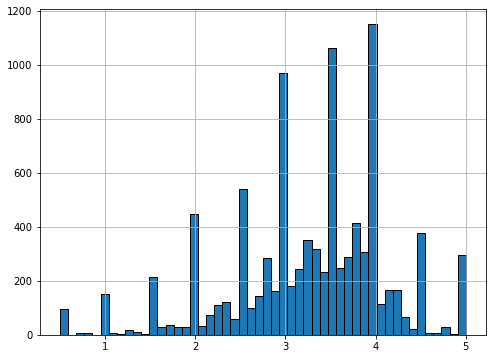

In [45]:
# Histogram for average ratings
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
gb_df['rating'].hist(bins=50)

Integer values have taller bars than the floating values since most of the users assign rating as integer value i.e. 1, 2, 3, 4 or 5. 
Data has a weak normal distribution with the mean of around 3.5. 
There are a few outliers in the data.

<Figure size 576x432 with 0 Axes>

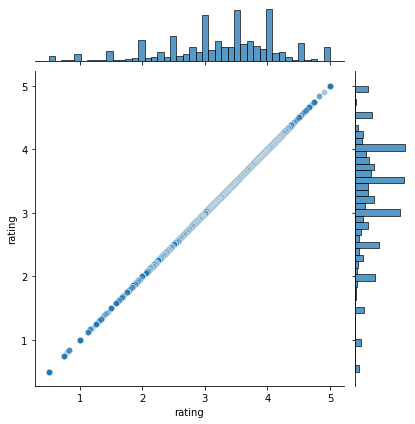

In [46]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating', data=gb_df, alpha=0.4)

In [47]:
gb_df['rating_counts'] = pd.DataFrame(df.groupby('title')['rating'].count())
gb_df

,rating,rating_counts
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1
...,...,...
Don't Look Now (1973),0.5,1
Journey 2: The Mysterious Island (2012),0.5,1
Joe Dirt 2: Beautiful Loser (2015),0.5,1


### 6. Word Cloud

In [48]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')

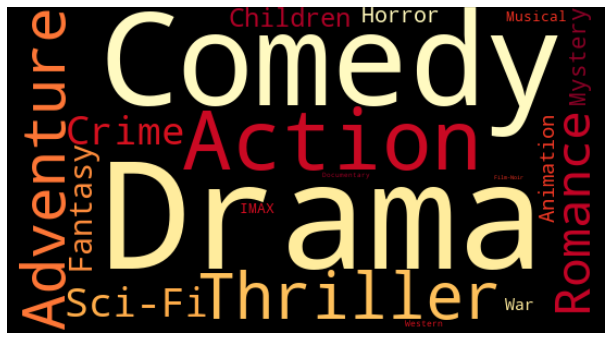

In [49]:
i = 0
genre_count = []
for genres in total_genre_movies.index:
    genre_count.append([genres, total_genre_movies[i]])
    i = i+1
    
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

words = dict()
for s in genre_count:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      colormap='YlOrRd',
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

From the above visualization we can determine that the most popular genre(s) in the given dataset are Drama and Comedy